In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "IPAexGothic"

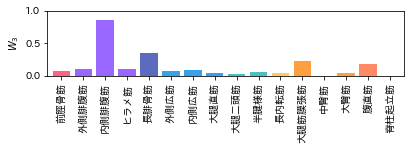

In [3]:
# 筋シナジークラス
class MuscleSynergy:
    """
    筋シナジーを扱うのクラス    

    Examples
    --------
    >>> ms = MuscleSynergy()
    >>> ms.read('220101-01-M-w.csv', '220101-01-M-h.csv', 'muscles.csv')
    >>> ms.plot_synergy()
    """

    def __init__(self):
        # 筋シナジーの基底ベクトル (筋肉 x シナジー)
        self.df_w: pd.DataFrame = None
        # 筋シナジーの時間変化
        self.df_h: pd.DataFrame = None
        # 筋肉の種類
        self.muscles: list = []

    def plot_synergy(self, synergy_idx: int = None):
        if synergy_idx is not None:
            fig, ax = plt.subplots(figsize=(6.4, 1.2))
            ax.set_ylim(0, 1)
            ax.set_ylabel(f'$W_{synergy_idx}$')
            try:
                self.df_w.iloc[:, synergy_idx-1].plot.bar(color=self.muscles.iloc[:,1], ax=ax, width=0.8, xlabel='')
            except IndexError as err:
                print(err)
                print('エラー: 筋シナジーの番号を誤っています。')

            plt.show()
        else:
            fig, ax = plt.subplots(3, figsize=(6.4, 1.2*3))
            for i in range(self.df_w.columns.size):
                ax[i].set_ylim(0, 1)
                self.df_w.iloc[:,i].plot.bar(
                    color=self.muscles.iloc[:,1], 
                    ax=ax[i], 
                    width=0.8, 
                    xlabel='')
                ax[i].set_ylabel(f'$W_{i+1}$')
                if i == 2: continue
                ax[i].tick_params(labelbottom=False)
            fig.tight_layout()
            plt.show()

    def read(self, w_file: str, h_file: str, muscles_file):
        try:
            self.df_w = pd.read_csv(w_file, header=None)
        except FileNotFoundError as err:
            print(err)
            print('エラー: 筋シナジーの基底ベクトルのデータファイル (CSV) を指定してください。')

        try:
            self.df_h = pd.read_csv(h_file, header=None)
        except FileNotFoundError as err:
            print(err)
            print('エラー: 筋シナジーの時間変化のデータファイル (CSV) を指定してください。')

        try:
            self.muscles = pd.read_csv(muscles_file, header=None)
        except FileNotFoundError as err:
            print(err)
            print('エラー: 筋肉定義ファイル (CSV) を指定してください。')

        self.df_w.insert(0, '筋肉', self.muscles.iloc[:,0])
        self.df_w.set_index(['筋肉'], inplace=True)
        self.df_w.columns = [ f'筋シナジー {_ + 1}' for _ in self.df_w.columns]



ms = MuscleSynergy()
ms.read('test-w.csv', 'test-h.csv', 'muscles.csv')
ms.plot_synergy(3)

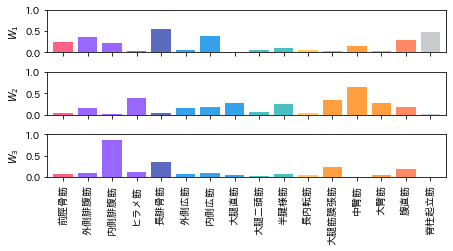

In [149]:
df_w = ms.df_w

fig, ax = plt.subplots(df_w.columns.size, figsize=(6.4, 1.2*3))
for i in range(df_w.columns.size):
    ax[i].set_ylim(0, 1)
    df_w.iloc[:,i].plot.bar(color=ms.muscles.iloc[:,1], ax=ax[i], width=0.8, xlabel='')
    ax[i].set_ylabel(f'$W_{i+1}$')
    if i == 2: continue
    ax[i].tick_params(labelbottom=False)
fig.tight_layout()
plt.show()

In [139]:
df_w.columns.size

3